# 1) Defining the Question

## a) Specifying the Question

The objective is to build a model that determines whether or not the patient's symptoms indicate that they have hypothyroid.

## b) Defining the Metric for Success

Have a model that gives an accuracy measure between 70%-90%

## c) Understanding the context

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Data Source [Link](http://bit.ly/hypothyroid_data)


## d) Recording the Experimental Design

1) Perform EDA

2) Perform Feature Engineering

3) Build Models

3.1) Decision Trees

- Random Forest
- AdaBoost
- Gradient-Boosted Decision Trees

3.2)Support Vector Machine(SVM)

4) Perform Hyperparameter Tuning in our Models

5) Compute the accuracy measure and the confusion matrix of each model.

# 2) Data Preparation

## 2.1) Disable Future Warnings and Import Libraries

In [225]:
# Import the necessary libraries
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [226]:
# Disable future warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



## 2.2) Load and Read Dataset

In [227]:
# Load the Dataset
Hypothyroid = pd.read_csv('/content/hypothyroid.csv')

# Preview the top of the dataset
Hypothyroid.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.2,y,57,y,1.28,y,44,n,?


In [228]:
# Check the bottom of the dataset
Hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.7,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.8,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.6,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.1,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.8,y,139,y,0.97,y,143,n,?


## 2.3) Checking the Data

In [229]:
Hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [230]:
Hypothyroid.shape

(3163, 26)

The dataset has 3163 rows and 26 columns before cleaning.

In [231]:
Hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

## 2.4) Cleaning the dataset

In [232]:
# Replacing the question marks as null values
Hypothyroid.replace('?',np.nan,inplace=True)
Hypothyroid.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.6,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.7,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.2,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.4,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.2,y,57,y,1.28,y,44,n,NaN


In [233]:
# Dropping the unnecessary columns 
Hypothyroid = Hypothyroid.drop(["TSH_measured","T3_measured", "TT4_measured", 
                         "T4U_measured", "FTI_measured","TBG_measured", "TBG"], axis = 1)

In [234]:
# Convert to numerical data
numerical_col = ['age','TSH','T3','TT4','T4U','FTI']
numerical_col

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [235]:
# Convert to categorical data
categorical_col = ['status','sex', 'on_thyroxine', 'query_on_thyroxine',
             'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']
categorical_col

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre']

In [236]:
# Convert objects to categorical data
Hypothyroid[categorical_col] = Hypothyroid[categorical_col].astype('category')

In [237]:
# Convert objects to numerical data
Hypothyroid[numerical_col] = Hypothyroid[numerical_col].apply(pd.to_numeric)

In [238]:
# Checking datatpyes
Hypothyroid.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH                           float64
T3                            float64
TT4                           float64
T4U                           float64
FTI                           float64
dtype: object

In [239]:
# Checking for unique values
Hypothyroid.nunique()

status                         2
age                           92
sex                            2
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH                          239
T3                            69
TT4                          268
T4U                          158
FTI                          280
dtype: int64

In [240]:
# Replace the null values with mode
#---
Hypothyroid['sex'] = Hypothyroid['sex'].fillna(Hypothyroid['sex'].mode()[0])

In [241]:
# Replace the missing values of age with the mean
#---
Hypothyroid['Age']= Hypothyroid['age'].fillna(Hypothyroid['age'].mean(), axis = 0)

In [242]:
# Dropping the age column that had missing values
#---
Hypothyroid = Hypothyroid.drop(["age"], axis = 1)

# Previewing the dataset to see the changes
Hypothyroid.head()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,Age
0,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0,72.0
1,hypothyroid,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0,15.0
2,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0,24.0
3,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0,24.0
4,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0,77.0


In [243]:
# Dropping the missing values 
Hypo_drop = Hypothyroid.dropna(axis = 0)
Hypo_drop

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,Age
0,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0,72.0
1,hypothyroid,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0,15.0
2,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0,24.0
3,hypothyroid,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0,24.0
4,hypothyroid,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,F,f,f,f,f,f,f,f,f,f,f,f,5.8,1.7,86.0,0.91,95.0,58.0
3159,negative,F,f,f,f,f,f,f,f,f,f,f,f,0.8,1.8,99.0,1.01,98.0,29.0
3160,negative,M,f,f,f,f,f,f,f,f,f,f,f,1.2,0.6,71.0,0.68,104.0,77.0
3161,negative,F,f,f,f,f,f,f,f,f,f,f,f,1.3,0.1,65.0,0.48,137.0,74.0


In [244]:
# Checking for null values
Hypo_drop.isnull().sum()

status                       0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Age                          0
dtype: int64

In [245]:
# Looping through the columns to encode
for col in categorical_col:

  categorical_enc = {col:{'f':0,'t':1}}

  Hypo_drop.replace(categorical_enc, inplace=True)


# Looping through the columns to encode
for col in categorical_col:

  categorical_enc = {col:{'y':0,'n':1}}

  Hypo_drop.replace(categorical_enc, inplace=True)


# Encoding the sex column
categorical_enc = {'sex':{'M':0,'F':1}}

Hypo_drop.replace(categorical_enc, inplace=True)

Hypo_drop['sex'].astype(int)

# Checking to see if the changes have been effected
Hypo_drop.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,Age
0,hypothyroid,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0,72.0
1,hypothyroid,1,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0,15.0
2,hypothyroid,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0,24.0
3,hypothyroid,1,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0,24.0
4,hypothyroid,0,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0,77.0


In [246]:
# Check the unique values in the status column
Hypo_drop['status'].unique()

['hypothyroid', 'negative']
Categories (2, object): ['hypothyroid', 'negative']

In [247]:
# Encoding the status column
for col in categorical_col:
  categorical_enc = {'status':{'hypothyroid':1,'negative':0}}

  Hypo_drop.replace(categorical_enc, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## 2.5) Feature Engineering

In [248]:
# Check for the duplicates
Hypo_drop.duplicated().sum()

59

In [249]:
# Dropping duplicates
Hypo_drop = Hypo_drop.drop_duplicates(subset=None, keep='first', inplace=False)

# Check the dataset 
len(Hypo_drop)

2339

The dataset shows that changes have been effected as we now have 2012 rows from the initial 3163 rows.

In [251]:
# Confirm if the duplicates have been dropped
Hypo_drop.duplicated().sum()

0

All duplicates have been dropped

In [252]:
# Check the statistical description of the dataset
Hypo_drop.describe()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI,Age
count,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000,2339.000000
mean,0.054724,0.687473,0.115861,0.011116,0.012826,0.035058,0.071826,0.064130,0.021804,0.039333,0.011543,0.000855,0.023514,5.867520,1.918256,106.985165,0.975263,113.797948,53.137561
std,0.227490,0.463622,0.320127,0.104867,0.112547,0.183965,0.258254,0.245037,0.146075,0.194428,0.106841,0.029235,0.151563,24.419651,0.953523,43.750072,0.232929,58.476385,17.626929
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000,82.000000,0.850000,91.000000,41.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,1.800000,103.000000,0.960000,107.000000,51.154214
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.200000,2.300000,125.000000,1.060000,126.000000,67.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,9.800000,450.000000,2.210000,881.000000,98.000000


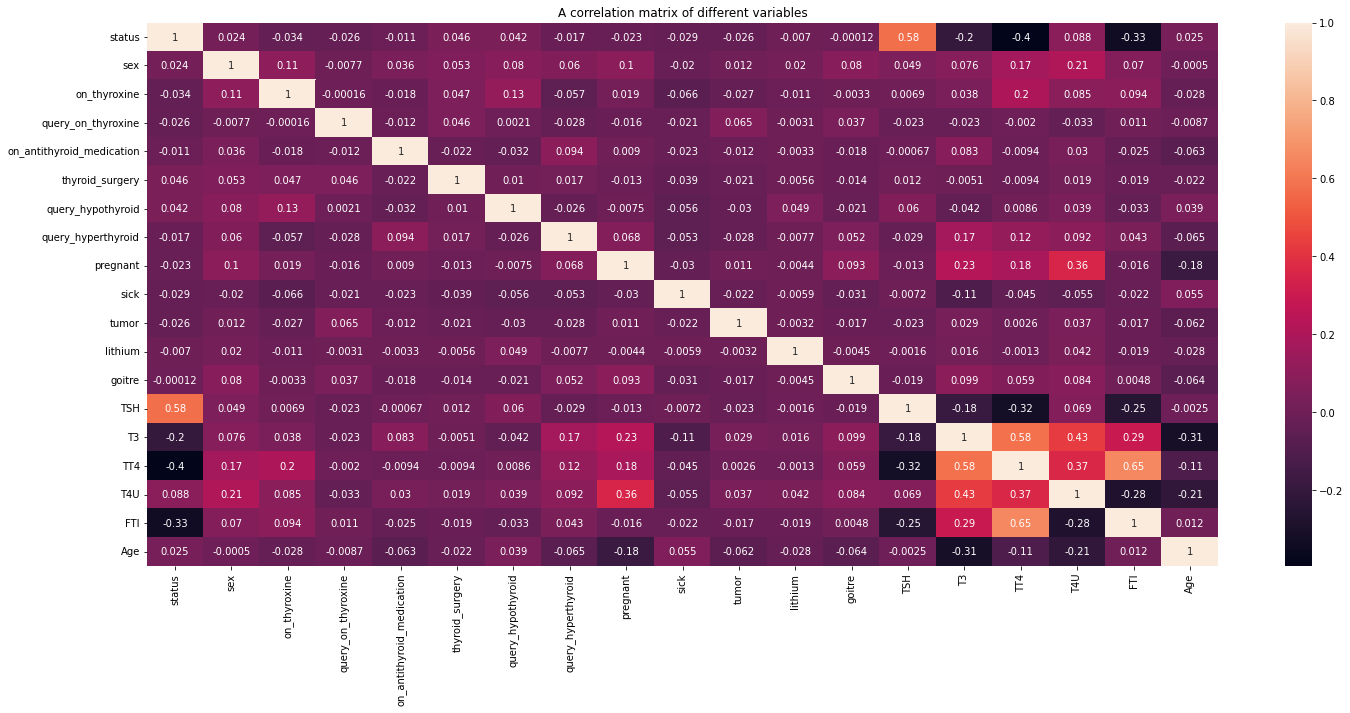

In [253]:
# Checking for correlation
plt.figure(figsize = (24,10))
sns.heatmap(Hypo_drop.corr(),annot=True)
plt.title('A correlation matrix of different variables')
plt.show()


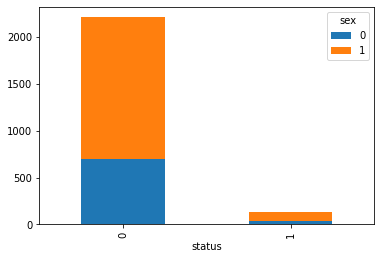

In [254]:
# Checking the status of each gender 
Hypo_drop.groupby(['status','sex']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

It shows that most participants tested negative but of those that tested positive, women were more affected than men.

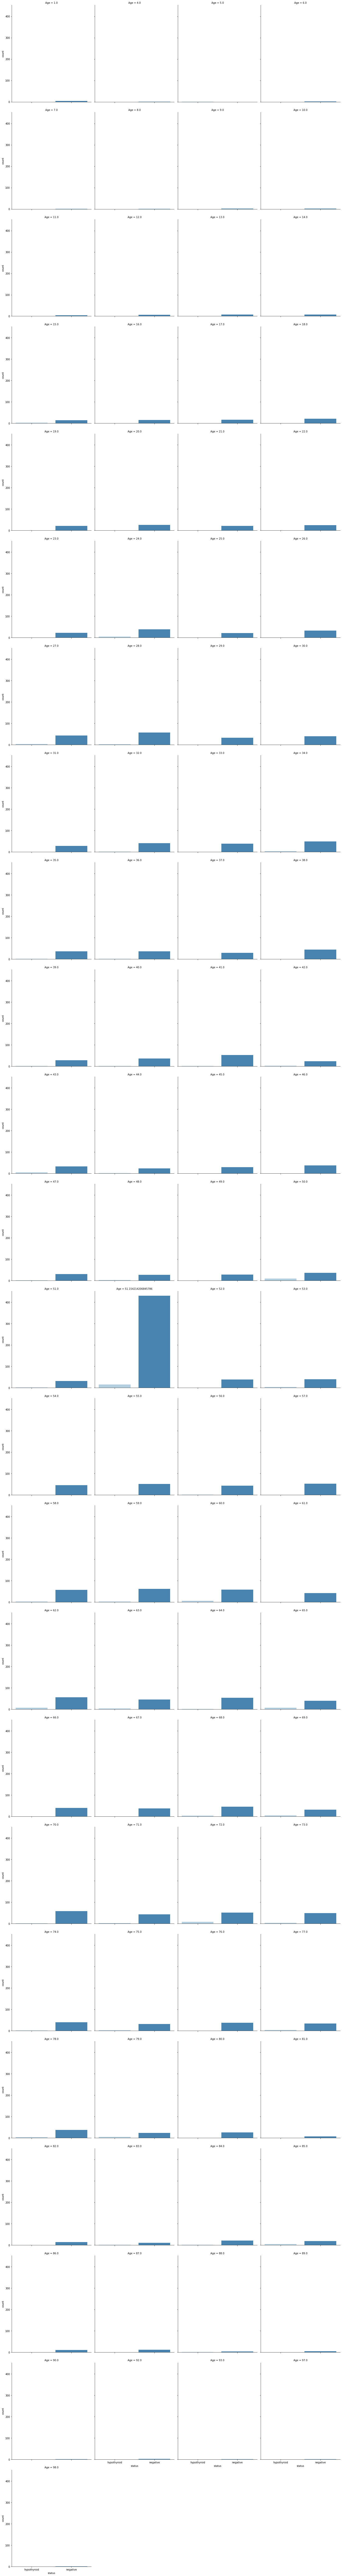

In [255]:
#Check the status for each age using histograms
sns.catplot("status", col="Age", col_wrap=4, data=Hypothyroid, kind="count", 
            height=6, aspect=.8, palette='Blues')

# 3) Modelling

## 3.1) Decision Tree Classifier

In [256]:
Hypo_drop.columns

Index(['status', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Age'],
      dtype='object')

In [257]:
# Split the independent and dependent variables
# We want to predict if someone is a suffering from hypothyroid, so let's use 
# the column status as our Y 
y = Hypo_drop['status'].values
X = Hypo_drop.drop('status', axis=1).values

test_features = ['Age','TSH','T3','TT4', 'T4U', 'FTI']

# We should be able to use nearly all the other features, 
# but for the sake of simplifying our visualization later, we only pick a few.
X = Hypo_drop[test_features].values
Z= Hypo_drop[test_features]

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [258]:
# Our dataset has strings which will not be of used during modelling so converting 
# them into dummies is the best option
X = pd.get_dummies(Z)

In [259]:
# Creating a decision tree classifier
tree = DecisionTreeClassifier(max_depth=4,min_samples_split=2,splitter='best')

# Train it based on our training set
tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)

# # Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9871794871794872


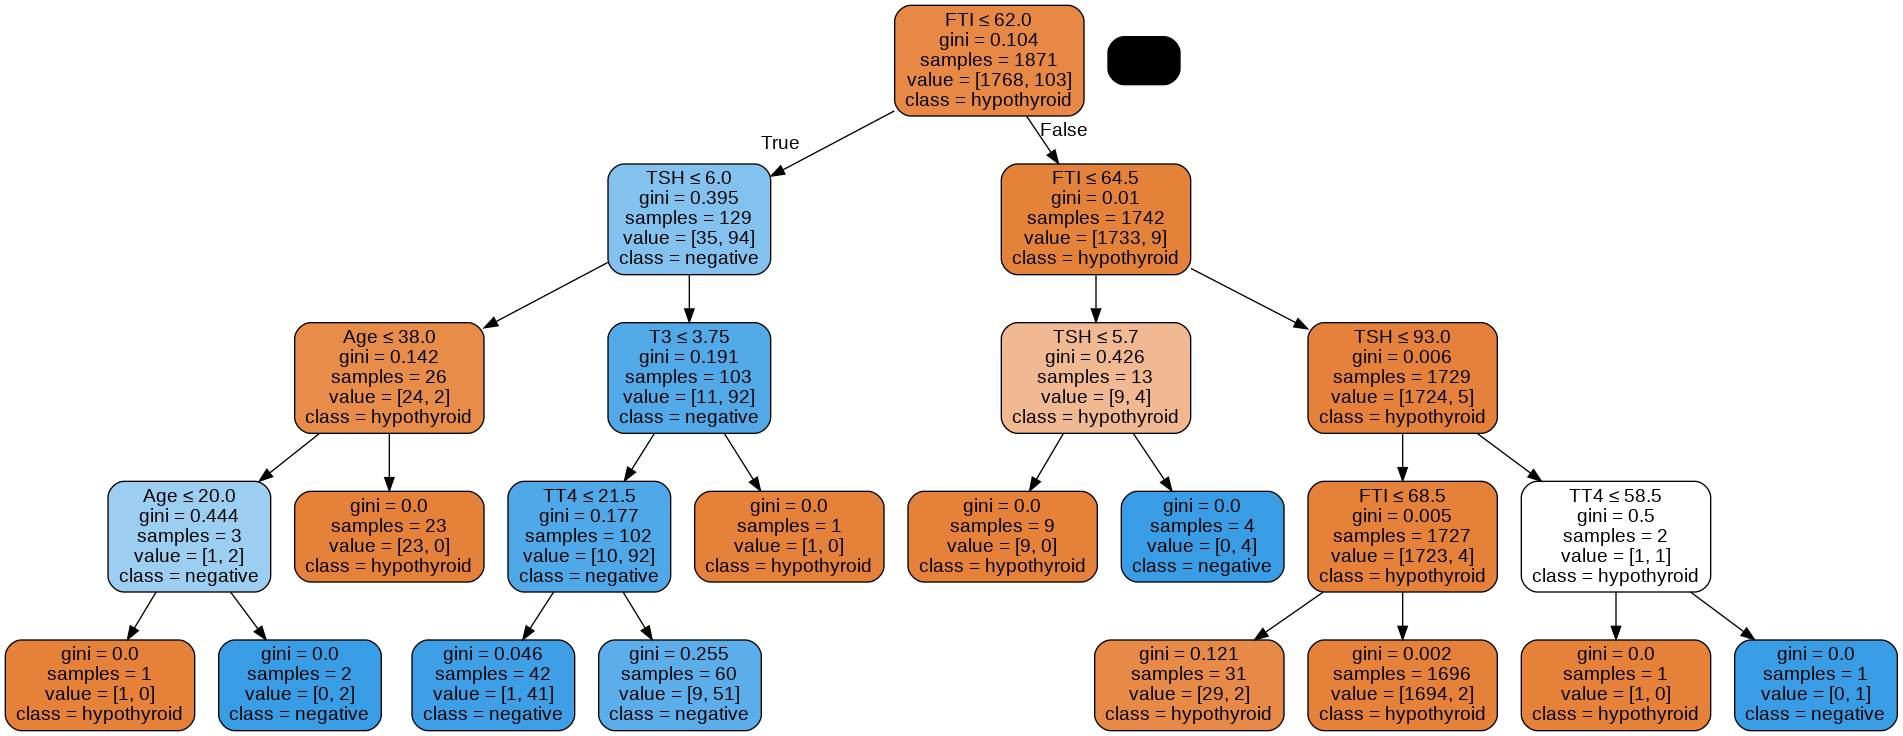

In [260]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['hypothyroid', 'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism.png')
Image(graph.create_png())

## 3.2) Random Forests

In [261]:
# Splitting the dataset to train and test
# During our modelling we will use a 80% as our training sample
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

 # Import randomforestClassifier
random = RandomForestClassifier(max_depth=3, min_samples_split=2, n_estimators=10, random_state=2)

# Fitting our train in the model
random.fit(X_train,y_train)

# Predicting  based on the model we  have trained
y_pred_random = random.predict(X_test)

In [262]:
# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01282051282051282
Mean Squared Error: 0.01282051282051282
Root Mean Squared Error: 0.11322770341445958


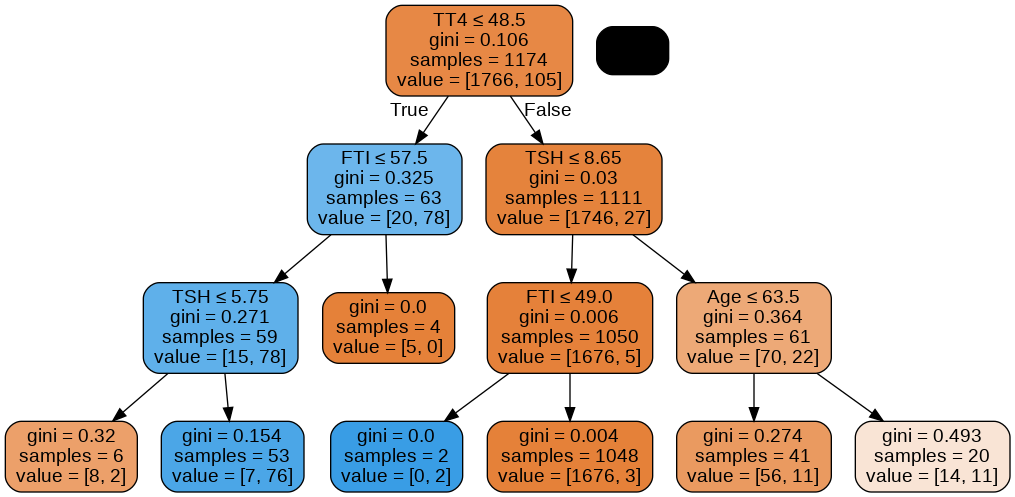

In [265]:
dot_data1 = StringIO()
# pick a specific tree from the forest
Tree = random.estimators_[5]

export_graphviz(Tree, out_file=dot_data1,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph2 = pydotplus.graph_from_dot_data(dot_data1.getvalue())  
graph2.write_png('hypothyroid_forest.png')
Image(graph2.create_png())

In [266]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, 
                       importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, 
# but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, 
# since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('Age', 0.02), ('TSH', 0.2), ('T3', 0.01), ('TT4', 0.01), ('T4U', 0.0), ('FTI', 0.76)]

Variable: FTI                  Importance: 0.76
Variable: TSH                  Importance: 0.2
Variable: Age                  Importance: 0.02
Variable: T3                   Importance: 0.01
Variable: TT4                  Importance: 0.01
Variable: T4U                  Importance: 0.0


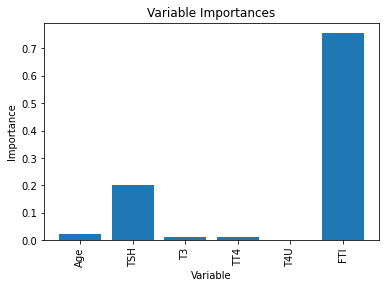

In [267]:
# Plotting the barchart
#---
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [268]:
# Computing the accuracy
print("random_Accuracy:",metrics.accuracy_score(y_test, y_pred_random))

random_Accuracy: 0.9871794871794872


In [269]:
# Computing the confusion matrix
print("Confusion matrix:",metrics.confusion_matrix(y_test, y_pred_random))

Confusion matrix: [[442   1]
 [  5  20]]


## 3.3) Adaboost

In [271]:
# Create the model
ada_boost = AdaBoostClassifier(learning_rate=1.0,n_estimators=100,random_state= 20)

# Fitting our train set
ada_boost.fit(X_train,y_train)

# Making prediction based on our X_test set
y_pred_ada = ada_boost.predict(X_test)

#Computing the accuracy
print("adaboost_Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))

adaboost_Accuracy: 0.9893162393162394


## 3.4) Gradient-Boosted Decision Trees

In [272]:
# Defining my classifier as gradient
gradient = GradientBoostingClassifier(learning_rate =0.1,n_estimators=100,
                                      max_depth=3,min_samples_split=2) 

# Fitting my train in the classifier
gradient.fit(X_train,y_train)

# Making prediction based on the model we have created
y_pred_gradient = gradient.predict(X_test)

# Compute the accuracy
print("gradient_Accuracy:",metrics.accuracy_score(y_test, y_pred_gradient))

gradient_Accuracy: 0.9850427350427351


In [273]:
# Computing the confusion matrix
print("Confusion matrrix:",metrics.confusion_matrix(y_test, y_pred_gradient))

Confusion matrrix: [[439   4]
 [  3  22]]


## 3.5) Support Vector Machine(SVM)

In [275]:
# Building our SVM model
svm  = SVC(kernel = 'linear', C=1.0,  gamma='auto',random_state=2)
svm1 = SVC(kernel = 'rbf', C=1.0, gamma='auto',random_state=2)

# Fitting the train into the model
svm.fit(X_train,y_train)
svm1.fit(X_train,y_train)

# Making the prediction
y_pred_svc = svm.predict(X_test)
y_pred_svc1 = svm1.predict(X_test)

In [276]:
# Compute the accuracy
print("svc_Accuracy with linear karnel:",metrics.accuracy_score(y_test, y_pred_svc))
#---
print("svc_1_Accuracy with rbf karnel:",metrics.accuracy_score(y_test, y_pred_svc))

svc_Accuracy with linear karnel: 0.9786324786324786
svc_1_Accuracy with rbf karnel: 0.9786324786324786


In [277]:
# Computing the confusion matrix
print("Confusion matrrix:",metrics.confusion_matrix(y_test, y_pred_svc))

Confusion matrrix: [[442   1]
 [  9  16]]


In [278]:
importance = random.feature_importances_
names = X.columns
random1 ={}
for name ,imp in zip(names,importance):
  random1[name]= imp
random1
from collections import OrderedDict
OrderedDict(sorted(random1.items(),key =lambda x:x[1],reverse=True))
# the top three variables that affected our model were TT4,FTI and TSH

OrderedDict([('TT4', 0.44397744367995423),
             ('FTI', 0.24579931167670038),
             ('TSH', 0.22837180561050494),
             ('T3', 0.04377820857331467),
             ('T4U', 0.033248484835963085),
             ('Age', 0.004824745623562665)])

In [279]:
 # Summary of all the accuracy scores for the different models used
print("Decison_Accuracy:",metrics.accuracy_score(y_test, y_pred))  
print("random_Accuracy:",metrics.accuracy_score(y_test, y_pred_random))  
print("adaboost_Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))
print("gradient_Accuracy:",metrics.accuracy_score(y_test, y_pred_gradient))
print("svc_Accuracy with linear karnel:",metrics.accuracy_score(y_test, y_pred_svc)) 
print("svc_1_Accuracy with rbf karnel:",metrics.accuracy_score(y_test, y_pred_svc))

Decison_Accuracy: 0.9871794871794872
random_Accuracy: 0.9871794871794872
adaboost_Accuracy: 0.9893162393162394
gradient_Accuracy: 0.9850427350427351
svc_Accuracy with linear karnel: 0.9786324786324786
svc_1_Accuracy with rbf karnel: 0.9786324786324786


# 4) Conclusion

All models have very high accuracy scores which could lead to overfitting.

The was no enough data for the analysis and Nairobi hospital should consider providing more data for an approriate model to be built.

There should also be a description of the dataset since this was a medical dataset and most terms are foreign to people without a medical background.